In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
df_world_cup = pd.read_csv('world_cup.csv',sep=',')
df_world_cup.head()

,Year,Host,Teams,Champion,Runner-Up,TopScorrer,Attendance,AttendanceAvg,Matches
0,2022,Qatar,32,Argentina,France,Kylian Mbappé - 8,3404252,53191,64
1,2018,Russia,32,France,Croatia,Harry Kane - 6,3031768,47371,64
2,2014,Brazil,32,Germany,Argentina,James Rodríguez - 6,3429873,53592,64
3,2010,South Africa,32,Spain,Netherlands,"Wesley Sneijder, Thomas Müller... - 5",3178856,49670,64
4,2006,Germany,32,Italy,France,Miroslav Klose - 5,3352605,52384,64


In [2]:
df_matches = pd.read_csv('matches_1930_2022.csv',sep=',')
df_matches.head()

,home_team,away_team,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,home_manager,home_captain,...,home_penalty_shootout_miss_long,away_penalty_shootout_miss_long,home_red_card,away_red_card,home_yellow_red_card,away_yellow_red_card,home_yellow_card_long,away_yellow_card_long,home_substitute_in_long,away_substitute_in_long
0,Argentina,France,3,3.3,4.0,3,2.2,2.0,Lionel Scaloni,Lionel Messi,...,NaN,"['3|1:1|Kingsley Coman', '5|2:1|Aurélien Tchou...",NaN,NaN,NaN,NaN,"['45+7&rsquor;|2:0|Enzo Fernández', '90+8&rsqu...","['55&rsquor;|2:0|Adrien Rabiot', '87&rsquor;|2...",['64&rsquor;|2:0|Marcos Acuña|for Ángel Di Mar...,['41&rsquor;|2:0|Randal Kolo Muani|for Ousmane...
1,Croatia,Morocco,2,0.7,NaN,1,1.2,NaN,Zlatko Dalić,Luka Modrić,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['69&rsquor;|2:1|Azzedine Ounahi', '84&rsquor;...",['61&rsquor;|2:1|Nikola Vlašić|for Andrej Kram...,['46&rsquor;|2:1|Ilias Chair|for Abdelhamid Sa...
2,France,Morocco,2,2.0,NaN,0,0.9,NaN,Didier Deschamps,Hugo Lloris,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['27&rsquor;|1:0|Sofiane Boufal'],['65&rsquor;|1:0|Marcus Thuram|for Olivier Gir...,['21&rsquor;|1:0|Selim Amallah|for Romain Saïs...
3,Argentina,Croatia,3,2.3,NaN,0,0.5,NaN,Lionel Scaloni,Lionel Messi,...,NaN,NaN,NaN,NaN,NaN,NaN,"['68&rsquor;|2:0|Cristian Romero', '71&rsquor;...","['32&rsquor;|0:0|Mateo Kovačić', '32&rsquor;|0...",['62&rsquor;|2:0|Lisandro Martínez|for Leandro...,"['46&rsquor;|2:0|Mislav Oršić|for Borna Sosa',..."
4,Morocco,Portugal,1,1.4,NaN,0,0.9,NaN,Hoalid Regragui,Romain Saïss,...,NaN,NaN,NaN,NaN,Walid Cheddira · 90+3,NaN,"['70&rsquor;|1:0|Achraf Dari', '90+1&rsquor;|1...",['87&rsquor;|1:0|Vitinha'],['57&rsquor;|1:0|Achraf Dari|for Romain Saïss'...,['51&rsquor;|1:0|João Cancelo|for Raphaël Guer...


In [3]:
index = df_matches.columns.get_loc('home_goal_long')
index

24

In [4]:
df_matches_new = df_matches.iloc[:,:22]

In [5]:
df_matches_new = df_matches_new.drop(columns=['Attendance','Venue','Officials','Year','Score'])
df_matches_new.head()

,home_team,away_team,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,home_manager,home_captain,away_manager,away_captain,Round,Date,Referee,Notes,Host
0,Argentina,France,3,3.3,4.0,3,2.2,2.0,Lionel Scaloni,Lionel Messi,Didier Deschamps,Hugo Lloris,Final,2022-12-18,Szymon Marciniak,Argentina won on penalty kicks following extra...,Qatar
1,Croatia,Morocco,2,0.7,NaN,1,1.2,NaN,Zlatko Dalić,Luka Modrić,Hoalid Regragui,Hakim Ziyech,Third-place match,2022-12-17,Abdulrahman Ibrahim Al Jassim,NaN,Qatar
2,France,Morocco,2,2.0,NaN,0,0.9,NaN,Didier Deschamps,Hugo Lloris,Hoalid Regragui,Romain Saïss,Semi-finals,2022-12-14,César Arturo Ramos,NaN,Qatar
3,Argentina,Croatia,3,2.3,NaN,0,0.5,NaN,Lionel Scaloni,Lionel Messi,Zlatko Dalić,Luka Modrić,Semi-finals,2022-12-13,Daniele Orsato,NaN,Qatar
4,Morocco,Portugal,1,1.4,NaN,0,0.9,NaN,Hoalid Regragui,Romain Saïss,Fernando Santos,Pepe,Quarter-finals,2022-12-10,Facundo Tello,NaN,Qatar


In [6]:
df_matches_new['Date'] = pd.to_datetime(df_matches_new['Date'])

df_matches_new[df_matches_new.select_dtypes(include=['int64', 'float64']).columns] = df_matches_new.select_dtypes(include=['int64', 'float64']).fillna(0)

# Fill NaN values for object columns with "no information"
df_matches_new[df_matches_new.select_dtypes(include=['object']).columns] = df_matches_new.select_dtypes(include=['object']).fillna("no information")

df_matches_new.head()

,home_team,away_team,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,home_manager,home_captain,away_manager,away_captain,Round,Date,Referee,Notes,Host
0,Argentina,France,3,3.3,4.0,3,2.2,2.0,Lionel Scaloni,Lionel Messi,Didier Deschamps,Hugo Lloris,Final,2022-12-18,Szymon Marciniak,Argentina won on penalty kicks following extra...,Qatar
1,Croatia,Morocco,2,0.7,0.0,1,1.2,0.0,Zlatko Dalić,Luka Modrić,Hoalid Regragui,Hakim Ziyech,Third-place match,2022-12-17,Abdulrahman Ibrahim Al Jassim,no information,Qatar
2,France,Morocco,2,2.0,0.0,0,0.9,0.0,Didier Deschamps,Hugo Lloris,Hoalid Regragui,Romain Saïss,Semi-finals,2022-12-14,César Arturo Ramos,no information,Qatar
3,Argentina,Croatia,3,2.3,0.0,0,0.5,0.0,Lionel Scaloni,Lionel Messi,Zlatko Dalić,Luka Modrić,Semi-finals,2022-12-13,Daniele Orsato,no information,Qatar
4,Morocco,Portugal,1,1.4,0.0,0,0.9,0.0,Hoalid Regragui,Romain Saïss,Fernando Santos,Pepe,Quarter-finals,2022-12-10,Facundo Tello,no information,Qatar


In [7]:
train_df = df_matches_new

In [8]:
train_df.value_counts('Notes')

Notes
no information                                               891
Required Extra Time                                           38
Argentina won on penalty kicks following extra time            6
Croatia won on penalty kicks following extra time              4
West Germany won on penalty kicks following extra time         3
Brazil won on penalty kicks following extra time               3
France won on penalty kicks following extra time               2
Bulgaria won on penalty kicks following extra time             1
Rep. of Ireland won on penalty kicks following extra time      1
Uruguay won on penalty kicks following extra time              1
Ukraine won on penalty kicks following extra time              1
Sweden won on penalty kicks following extra time               1
Spain won on penalty kicks following extra time                1
Russia won on penalty kicks following extra time               1
Paraguay won on penalty kicks following extra time             1
Portugal won on pen

In [9]:
train_df['result_by_penalty'] = train_df['Notes'].str.contains('penalty', case=False, na=False).astype(int)

# Add the 'result_in_extra_time' column
train_df['result_in_extra_time'] = train_df['Notes'].str.contains('Required Extra Time', case=False, na=False).astype(int)

train_df.head()

,home_team,away_team,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,home_manager,home_captain,away_manager,away_captain,Round,Date,Referee,Notes,Host,result_by_penalty,result_in_extra_time
0,Argentina,France,3,3.3,4.0,3,2.2,2.0,Lionel Scaloni,Lionel Messi,Didier Deschamps,Hugo Lloris,Final,2022-12-18,Szymon Marciniak,Argentina won on penalty kicks following extra...,Qatar,1,0
1,Croatia,Morocco,2,0.7,0.0,1,1.2,0.0,Zlatko Dalić,Luka Modrić,Hoalid Regragui,Hakim Ziyech,Third-place match,2022-12-17,Abdulrahman Ibrahim Al Jassim,no information,Qatar,0,0
2,France,Morocco,2,2.0,0.0,0,0.9,0.0,Didier Deschamps,Hugo Lloris,Hoalid Regragui,Romain Saïss,Semi-finals,2022-12-14,César Arturo Ramos,no information,Qatar,0,0
3,Argentina,Croatia,3,2.3,0.0,0,0.5,0.0,Lionel Scaloni,Lionel Messi,Zlatko Dalić,Luka Modrić,Semi-finals,2022-12-13,Daniele Orsato,no information,Qatar,0,0
4,Morocco,Portugal,1,1.4,0.0,0,0.9,0.0,Hoalid Regragui,Romain Saïss,Fernando Santos,Pepe,Quarter-finals,2022-12-10,Facundo Tello,no information,Qatar,0,0


In [10]:
train_df['goal_diff'] = abs(train_df['home_score'] - train_df['away_score'])

# Add the 'home_team_xg_diff' column
train_df['home_team_xg_diff'] = train_df['home_score'] - train_df['home_xg']

# Add the 'away_team_xg_diff' column
train_df['away_team_xg_diff'] = train_df['away_score'] - train_df['away_xg']

# Add the 'home_team_xg_clf' column
train_df['home_team_xg_clf'] = train_df['home_team_xg_diff'].apply(
    lambda x: 'scored less than xg' if x < 0 else 'scored more than xg'
)

# Add the 'away_team_xg_clf' column
train_df['away_team_xg_clf'] = train_df['away_team_xg_diff'].apply(
    lambda x: 'scored less than xg' if x < 0 else 'scored more than xg'
)

train_df

,home_team,away_team,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,home_manager,home_captain,...,Referee,Notes,Host,result_by_penalty,result_in_extra_time,goal_diff,home_team_xg_diff,away_team_xg_diff,home_team_xg_clf,away_team_xg_clf
0,Argentina,France,3,3.3,4.0,3,2.2,2.0,Lionel Scaloni,Lionel Messi,...,Szymon Marciniak,Argentina won on penalty kicks following extra...,Qatar,1,0,0,-0.3,0.8,scored less than xg,scored more than xg
1,Croatia,Morocco,2,0.7,0.0,1,1.2,0.0,Zlatko Dalić,Luka Modrić,...,Abdulrahman Ibrahim Al Jassim,no information,Qatar,0,0,1,1.3,-0.2,scored more than xg,scored less than xg
2,France,Morocco,2,2.0,0.0,0,0.9,0.0,Didier Deschamps,Hugo Lloris,...,César Arturo Ramos,no information,Qatar,0,0,2,0.0,-0.9,scored more than xg,scored less than xg
3,Argentina,Croatia,3,2.3,0.0,0,0.5,0.0,Lionel Scaloni,Lionel Messi,...,Daniele Orsato,no information,Qatar,0,0,3,0.7,-0.5,scored more than xg,scored less than xg
4,Morocco,Portugal,1,1.4,0.0,0,0.9,0.0,Hoalid Regragui,Romain Saïss,...,Facundo Tello,no information,Qatar,0,0,1,-0.4,-0.9,scored less than xg,scored less than xg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,Argentina,France,1,0.0,0.0,0,0.0,0.0,Francisco Olazar,Manuel Ferreira,...,Gilberto Rego,no information,Uruguay,0,0,1,1.0,0.0,scored more than xg,scored more than xg
960,Yugoslavia,Brazil,2,0.0,0.0,1,0.0,0.0,Bosko Simonovic,Milutin Ivković,...,Anibal Tejada,no information,Uruguay,0,0,1,2.0,1.0,scored more than xg,scored more than xg
961,Romania,Peru,3,0.0,0.0,1,0.0,0.0,Octav Luchide,Emerich Vogl,...,Alberto Warnken,no information,Uruguay,0,0,2,3.0,1.0,scored more than xg,scored more than xg
962,United States,Belgium,3,0.0,0.0,0,0.0,0.0,Bob Millar,Tom Florie,...,Jose Macias,no information,Uruguay,0,0,3,3.0,0.0,scored more than xg,scored more than xg


In [11]:
# Add the 'result' column with the updated logic
train_df['result'] = train_df.apply(
    lambda row: 'H' if row['home_score'] > row['away_score'] else
                'A' if row['home_score'] < row['away_score'] else
                'H' if row['home_score'] == row['away_score'] and row['home_penalty'] > row['away_penalty'] else
                'A' if row['home_score'] == row['away_score'] and row['home_penalty'] < row['away_penalty'] else
                'D',
    axis=1
)


[Text(0.5, 0, 'Match Result'), Text(0, 0.5, 'Density')]

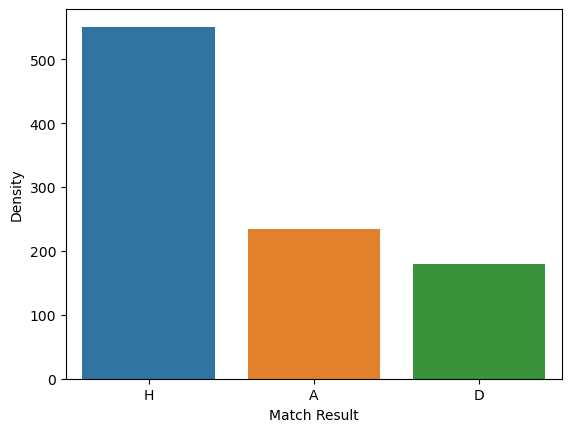

In [12]:
sns.countplot(x='result', data=train_df).set(xlabel='Match Result', ylabel='Density')

In [13]:
df_fifa_ranking = pd.read_csv('fifa_ranking_2022-10-06.csv',sep=',')
df_fifa_ranking.head()

,team,team_code,association,rank,previous_rank,points,previous_points
0,Brazil,BRA,CONMEBOL,1,1,1841.30,1837.56
1,Belgium,BEL,UEFA,2,2,1816.71,1821.92
2,Argentina,ARG,CONMEBOL,3,3,1773.88,1770.65
3,France,FRA,UEFA,4,4,1759.78,1764.85
4,England,ENG,UEFA,5,5,1728.47,1737.46


In [14]:
qatar_final_match = train_df.iloc[[0]].reset_index(drop=True)

# Remove the first row from the original DataFrame
train_df = train_df.iloc[1:].reset_index(drop=True)

In [15]:
qatar_final_match_no_date = qatar_final_match.drop(columns=['Date'])
train_df_no_date = train_df.drop(columns=['Date'])

In [16]:
qatar_final_match_no_date

,home_team,away_team,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,home_manager,home_captain,...,Notes,Host,result_by_penalty,result_in_extra_time,goal_diff,home_team_xg_diff,away_team_xg_diff,home_team_xg_clf,away_team_xg_clf,result
0,Argentina,France,3,3.3,4.0,3,2.2,2.0,Lionel Scaloni,Lionel Messi,...,Argentina won on penalty kicks following extra...,Qatar,1,0,0,-0.3,0.8,scored less than xg,scored more than xg,H


In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, precision_score, classification_report

# Load datasets
# Assuming train_df and df are already loaded into memory

# Step 1: Split train_df into train, validation, and test sets
"""X = train_df_no_date.drop(columns=['result'])  # Features
y = train_df_no_date['result']  # Target

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Step 2: Label encoding for the target variable

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_valid = label_encoder.transform(y_valid)
y_test = label_encoder.transform(y_test)

categorical_columns = X.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    # Combine all datasets to ensure the encoder sees all possible categories
    combined_data = pd.concat([X_train[col], X_valid[col], X_test[col], qatar_final_match_no_date[col]], axis=0)
    le.fit(combined_data)
    label_encoders[col] = le
    
    # Transform all datasets consistently
    X_train[col] = le.transform(X_train[col])
    X_valid[col] = le.transform(X_valid[col])
    X_test[col] = le.transform(X_test[col])
    #qatar_final_match_no_date[col] = le.transform(qatar_final_match_no_date[col])"""

    # Step 1: Split train_df into train, validation, and test sets
X = train_df_no_date.drop(columns=['result'])  # Features
y = train_df_no_date['result']  # Target

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Step 2: Label encoding for categorical variables
categorical_columns = X.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    # Fit the encoder on the combined train, valid, and test sets for consistency
    combined_data = pd.concat([X_train[col], X_valid[col], X_test[col], qatar_final_match_no_date[col]], axis=0)
    le.fit(combined_data)
    label_encoders[col] = le
    X_train[col] = le.transform(X_train[col])
    X_valid[col] = le.transform(X_valid[col])
    X_test[col] = le.transform(X_test[col])
    qatar_final_match_no_date[col] = le.transform(qatar_final_match_no_date[col])

In [18]:
# Step 4: Train the MLP model
mlp = MLPClassifier(hidden_layer_sizes=(128,), activation='relu', solver='adam', 
                    max_iter=200, random_state=42)
mlp.fit(X_train, y_train)

# Step 5: Evaluate the model
"""y_pred = mlp.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')

print("F1 Score:", f1)
print("Precision:", precision)
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))"""

# Step 5: Evaluate the model
y_pred = mlp.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')

print("F1 Score:", f1)
print("Precision:", precision)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

F1 Score: 0.827187603802889
Precision: 0.8269052448565634

Classification Report:
               precision    recall  f1-score   support

           A       0.79      0.77      0.78        35
           D       0.67      0.67      0.67        27
           H       0.89      0.90      0.90        83

    accuracy                           0.83       145
   macro avg       0.78      0.78      0.78       145
weighted avg       0.83      0.83      0.83       145



In [19]:
# Ensure 'result' column is dropped from features but retained for output
qatar_final_match_no_date_features = qatar_final_match_no_date.drop(columns=['result'], errors='ignore')
#qatar_final_match_no_date_features = qatar_final_match_no_date_features[X_train.columns]

# Step 6: Predict results for the separate 'df' dataset
df_result = mlp.predict(qatar_final_match_no_date_features)

# Add the predicted results to the DataFrame
qatar_final_match_no_date['predicted_result'] = df_result

# Reverse label encoding for 'home_team' and 'away_team'
qatar_final_match_no_date['home_team'] = label_encoders['home_team'].inverse_transform(qatar_final_match_no_date['home_team'])
qatar_final_match_no_date['away_team'] = label_encoders['away_team'].inverse_transform(qatar_final_match_no_date['away_team'])

# Display the predictions with actual results
print("\nPredictions for the Qatar Final match with actual results:")
print(qatar_final_match_no_date[['home_team', 'away_team', 'result', 'predicted_result']])


Predictions for the Qatar Final match with actual results:
   home_team away_team result predicted_result
0  Argentina    France      H                A


In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, SimpleRNN, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, f1_score, precision_score
from tensorflow.keras.regularizers import L2
from tensorflow.keras.optimizers import Adam    
from sklearn.preprocessing import StandardScaler

train_df = train_df.sort_values(by='Date')  # Ensure data is sorted by date

# Extract features from the date column
if 'Date' in train_df.columns:
    train_df['month'] = train_df['Date'].dt.month
    train_df['day_of_week'] = train_df['Date'].dt.dayofweek
    train_df = train_df.drop(columns=['Date'])  # Drop the original date column

X_rnn = train_df.drop(columns=['result'])
y_rnn = train_df['result']

# Step 2: Encode the Target Variable ('result')
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_rnn)  # Encode target to integers ('H', 'A', 'D' -> 0, 1, 2)

# Step 3: Encode Categorical Features
categorical_columns = X_rnn.select_dtypes(include=['object']).columns
label_encoders = {}  # Dictionary to store encoders for categorical columns
for col in categorical_columns:
    le = LabelEncoder()
    X_rnn[col] = le.fit_transform(X_rnn[col])  # Encode the column
    label_encoders[col] = le  # Save the encoder for future use (e.g., when preprocessing `df`)


In [21]:
def create_balanced_sequences(features, target, n_steps=3):
    """
    Create balanced sequences where each sequence contains a mix of outcomes.
    Args:
        features (np.array): Feature matrix.
        target (np.array): Target vector (encoded outcomes: 'H', 'A', 'D').
        n_steps (int): Number of timesteps per sequence.
    Returns:
        X_seq (np.array): Feature sequences.
        y_seq (np.array): Corresponding target outcomes for each sequence.
    """
    # Group indices by target classes
    groups = {outcome: np.where(target == outcome)[0] for outcome in np.unique(target)}
    
    X_seq, y_seq = [], []
    
    # Create sequences
    for i in range(n_steps, len(features)):
        # Sample indices from each group for the sequence
        sampled_indices = []
        for outcome, indices in groups.items():
            sampled_indices.append(indices[i % len(indices)])  # Cycle through the group
        
        # Ensure sequence size matches n_steps
        sampled_indices = sorted(set(sampled_indices))[-n_steps:]  # Take only the last n_steps
        sampled_features = features[sampled_indices]
        
        # Append to sequences
        if sampled_features.shape[0] == n_steps:  # Ensure the sequence is complete
            X_seq.append(sampled_features)
            y_seq.append(target[i])  # Target corresponds to the last match in the sequence
    
    return np.array(X_seq), np.array(y_seq)

X_values = X_rnn.values.astype('float32')  # Convert features to float32
X_seq, y_seq = create_balanced_sequences(X_values, y_encoded, n_steps=3)
print(f"Number of sequences generated: {len(X_seq)}")
if len(X_seq) == 0:
    raise ValueError("No sequences generated. Check your input data or n_steps value.")


Number of sequences generated: 960


In [22]:
# Step 6: Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_seq, y_seq, test_size=0.2, random_state=42, stratify=y_seq
)

In [23]:
# Convert targets to one-hot encoding
from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [24]:
model = Sequential()
model.add(SimpleRNN(64, input_shape=(X_train.shape[1], X_train.shape[2]), 
                    return_sequences=False, 
                    kernel_regularizer=L2(0.001)))  # Add weight decay

# Add Dropout for additional regularization
model.add(Dropout(0.2))

# Add Dense layers with L2 regularization
model.add(Dense(32, activation='relu', kernel_regularizer=L2(0.001)))  # Add weight decay
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax', kernel_regularizer=L2(0.001)))  # Add weight decay

# Compile the model
optimizer = Adam(learning_rate=0.001)  # You can customize learning rate here
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 8: Train the Model
history = model.fit(X_train, y_train_one_hot, epochs=50, batch_size=32, verbose=1)



Epoch 1/50


24/24 [==============================] - 1s 2ms/step - loss: 1.2540 - accuracy: 0.4479
Epoch 2/50
24/24 [==============================] - 0s 1ms/step - loss: 1.1409 - accuracy: 0.5169
Epoch 3/50
24/24 [==============================] - 0s 1ms/step - loss: 1.1214 - accuracy: 0.5260
Epoch 4/50
24/24 [==============================] - 0s 1ms/step - loss: 1.0695 - accuracy: 0.5508
Epoch 5/50
24/24 [==============================] - 0s 1ms/step - loss: 1.1100 - accuracy: 0.5299
Epoch 6/50
24/24 [==============================] - 0s 1ms/step - loss: 1.0693 - accuracy: 0.5573
Epoch 7/50
24/24 [==============================] - 0s 1ms/step - loss: 1.0631 - accuracy: 0.5547
Epoch 8/50
24/24 [==============================] - 0s 1ms/step - loss: 1.0576 - accuracy: 0.5599
Epoch 9/50
24/24 [==============================] - 0s 1ms/step - loss: 1.0421 - accuracy: 0.5651
Epoch 10/50
24/24 [==============================] - 0s 1ms/step - loss: 1.0555 - accuracy: 0.5534
Epoch 11/50
24/

In [25]:
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Metrics
f1_rnn = f1_score(y_test, y_pred, average='weighted')
precision_rnn = precision_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1_rnn)
print("Precision:", precision_rnn)
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

6/6 [==============================] - 0s 1ms/step
F1 Score: 0.4201085534548268
Precision: 0.445093201754386

Classification Report:
               precision    recall  f1-score   support

           A       0.50      0.02      0.04        47
           D       0.00      0.00      0.00        36
           H       0.57      0.99      0.72       109

    accuracy                           0.57       192
   macro avg       0.36      0.34      0.25       192
weighted avg       0.45      0.57      0.42       192



c:\Users\ayand\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ayand\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ayand\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ayand\anaconda3\Lib\site-packages\sklearn\metrics\_classifi

In [26]:
# Helper function to pad sequences for single-match cases
def pad_sequences_for_df(features, n_steps=3):
    if len(features) < n_steps:
        # Pad with zeros for missing timesteps
        padding = np.zeros((n_steps - len(features), features.shape[1]))
        features = np.vstack((padding, features))
    return [features[-n_steps:]]  # Return the last n_steps

# Prepare 'df' for prediction
df = qatar_final_match.sort_values(by='Date')  # Ensure 'df' is sorted by date

# Extract features from the date column
if 'Date' in qatar_final_match.columns:  # Replace 'date' with   your actual date column name
    qatar_final_match['month'] = qatar_final_match['Date'].dt.month
    qatar_final_match['day_of_week'] = qatar_final_match['Date'].dt.dayofweek
    qatar_final_match = qatar_final_match.drop(columns=['Date'])  # Drop the original date column

df_features = qatar_final_match.drop(columns=['result'], errors='ignore')  # Drop 'result' if present

# Encode and scale 'df' features
for col in categorical_columns:
    df_features[col] = label_encoders[col].transform(df_features[col])
#df_features[numeric_columns] = scaler.transform(df_features[numeric_columns])

# Handle single match with padding
df_values = df_features.values.astype('float32')
df_seq = pad_sequences_for_df(df_values, n_steps=3)

# Convert to numpy array for prediction
df_seq = np.array(df_seq)

# Predict
df_result_probs = model.predict(df_seq)
df_result = np.argmax(df_result_probs, axis=1)

# Add predictions to 'df'
qatar_final_match['predicted_result'] = label_encoder.inverse_transform(df_result)

# Display predictions
print("\nPredictions for the separated Qatarfinal match dataset:")
print(qatar_final_match[['home_team', 'away_team', 'result', 'predicted_result']])


1/1 [==============================] - 0s 106ms/step

Predictions for the separated Qatarfinal match dataset:
   home_team away_team result predicted_result
0  Argentina    France      H                H


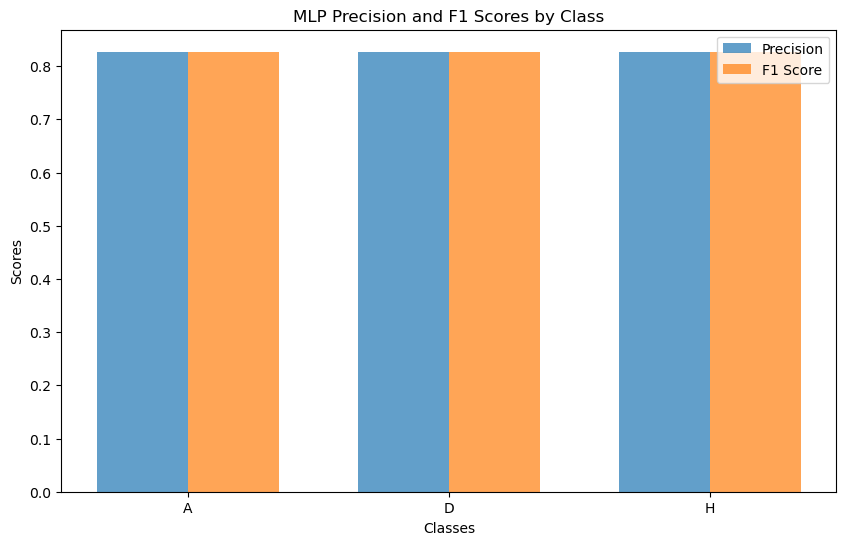

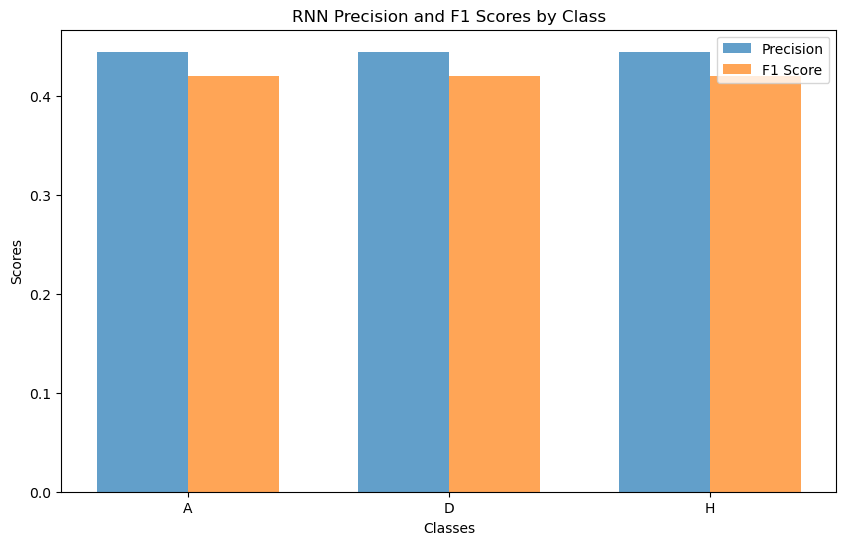

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Example scores
# MLP scores
precision_mlp = precision
f1_mlp = f1

# RNN scores
precision_rnn = precision_rnn
f1_rnn = f1_rnn

# Define labels for the classes
classes = label_encoder.classes_

# Plot MLP Scores
plt.figure(figsize=(10, 6))
x = np.arange(len(classes))  # Positions for the classes
bar_width = 0.35

plt.bar(x - bar_width / 2, precision_mlp, bar_width, label="Precision", alpha=0.7)
plt.bar(x + bar_width / 2, f1_mlp, bar_width, label="F1 Score", alpha=0.7)
plt.xlabel("Classes")
plt.ylabel("Scores")
plt.title("MLP Precision and F1 Scores by Class")
plt.xticks(x, classes)  # Add class names to x-axis
plt.legend()
plt.show()

# Plot RNN Scores
plt.figure(figsize=(10, 6))

plt.bar(x - bar_width / 2, precision_rnn, bar_width, label="Precision", alpha=0.7)
plt.bar(x + bar_width / 2, f1_rnn, bar_width, label="F1 Score", alpha=0.7)
plt.xlabel("Classes")
plt.ylabel("Scores")
plt.title("RNN Precision and F1 Scores by Class")
plt.xticks(x, classes)  # Add class names to x-axis
plt.legend()
plt.show()
